In [1]:
from dateutil import parser
from datetime import datetime
import pandas as pd
from perceval.backends.core.meetup import Meetup
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
MEETUP_API_TOKEN = "valid"

In [3]:
group_name = "Mozilla-Community-Madrid"

In [4]:
group = Meetup(group=group_name, sleep_for_rate=True, api_token=MEETUP_API_TOKEN)

In [5]:
items = []
for item in group.fetch():
    items.append(item)

In [6]:
df = pd.DataFrame()

In [21]:
for item in items:
    if item['data']['status'] == 'past':
        for rsvp in item['data']['rsvps']:
            data = {
                'rsvp_date': datetime.fromtimestamp(rsvp['updated']/1000),
                'member_id': rsvp['member']['id'],
                'member_name': rsvp['member']['name'],
                'rsvp_response': rsvp['response'],
                'meetup_name': item['data']['name'],
                'meetup_id': item['data']['id'],
                'meetup_date': parser.parse(item['data']['local_date']),
                'meetup_day': parser.parse(item['data']['local_date']).isoweekday(),
                'meetup_hour': item['data']['local_time'].split(':')[0],
                'group': item['data']['group']['name']
            }
            df = df.append(data, ignore_index = True)

In [22]:
df

group meetup_date  meetup_day meetup_hour  meetup_id  \
0    Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
1    Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
2    Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
3    Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
4    Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
5    Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
6    Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
7    Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
8    Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
9    Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
10   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
11   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
12   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
13   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
14   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
15   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
16   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
17   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
18   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
19   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
20   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
21   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
22   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
23   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
24   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
25   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
26   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
27   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
28   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
29   Mozilla Community Madrid  2013-09-12         4.0          18  134517082   
..                        ...         ...         ...         ...        ...   
396  Mozilla Community Madrid  2015-10-29         4.0          18  226183897   
397  Mozilla Community Madrid  2015-10-29         4.0          18  226183897   
398  Mozilla Community Madrid  2015-10-29         4.0          18  226183897   
399  Mozilla Community Madrid  2015-10-29         4.0          18  226183897   
400  Mozilla Community Madrid  2015-10-29         4.0          18  226183897   
401  Mozilla Community Madrid  2015-10-29         4.0          18  226183897   
402  Mozilla Community Madrid  2015-10-29         4.0          18  226183897   
403  Mozilla Community Madrid  2015-10-29         4.0          18  226183897   
404  Mozilla Community Madrid  2015-10-29         4.0          18  226183897   
405  Mozilla Community Madrid  2015-10-29         4.0          18  226183897   
406  Mozilla Community Madrid  2015-10-29         4.0          18  226183897   
407  Mozilla Community Madrid  2016-03-17         4.0          18  229038291   
408  Mozilla Community Madrid  2016-03-17         4.0          18  229038291   
409  Mozilla Community Madrid  2016-03-17         4.0          18  229038291   
410  Mozilla Community Madrid  2016-03-17         4.0          18  229038291   
411  Mozilla Community Madrid  2016-03-17         4.0          18  229038291   
412  Mozilla Community Madrid  2016-03-17         4.0          18  229038291   
413  Mozilla Community Madrid  2016-03-17         4.0          18  229038291   
414  Mozilla Community M

In [34]:
df2 = df.set_index('rsvp_date')

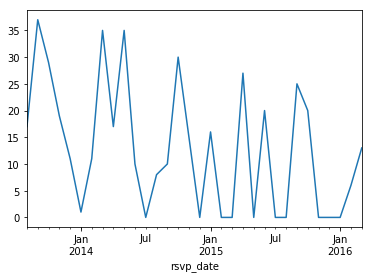

In [35]:
df2.resample('M').member_id.nunique().plot()

In [40]:
df.groupby(['meetup_name', 'rsvp_response']).member_id.nunique()

meetup_name                                               rsvp_response
De Firefox OS a Connected Devices                         no                9
                                                          yes              10
Encuentro de Abril                                        no                7
                                                          yes              24
Encuentro de Junio                                        no                7
                                                          yes              13
Encuentro de Marzo (anteriormente conocido como Febrero)  no                8
                                                          yes              38
Encuentro de Noviembre                                    no               11
                                                          yes              31
Encuentro de Octubre                                      no               22
                                                          yes         